In [9]:
# !pip install numpy
# !pip install pandas
import numpy as np
import pandas as pd
import os, sys, datetime
######### Pysaprk
#!pip install pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
#!pip install neattext
import neattext.functions as nfx
#!pip install seaborn
import seaborn as sns
#!pip install -U scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [10]:
sc=SparkContext(master='local[2]')
print(sc)

<SparkContext master=local[2] appName=pyspark-shell>


In [11]:
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [12]:
spark=SparkSession.builder.appName("Text Mining").getOrCreate()
print(spark)

In [13]:
df=pd.read_csv("udemy_courses.csv" )
print(df.head())

   course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792        

In [14]:
df.shape
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [15]:
df2=df[['course_title', 'subject']]
df2.shape
#print(df2.head())

(3678, 2)

In [16]:
## Text pre-processing- Remove noise- lower case, remove punct, remove stopwords
########## normalize, then Lammatize and Stemming @@@@@@@@@@@@@@@@@@@@@
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [17]:
df['course_title_clean']=df['course_title'].apply(nfx.remove_stopwords)
df['course_title_clean']=df['course_title_clean'].apply(nfx.remove_special_characters)
df['course_title_clean']=df['course_title_clean'].str.lower()


In [18]:
print(df['course_title'].head(), df['course_title_clean'].head())

0                   Ultimate Investment Banking Course
1    Complete GST Course & Certification - Grow You...
2    Financial Modeling for Business Analysts and C...
3    Beginner to Pro - Financial Analysis in Excel ...
4         How To Maximize Your Profits Trading Options
Name: course_title, dtype: object 0                   ultimate investment banking course
1    complete gst course  certification  grow practice
2     financial modeling business analysts consultants
3          beginner pro  financial analysis excel 2017
4                     maximize profits trading options
Name: course_title_clean, dtype: object


In [19]:
### convert word to vectors
## tfidf
## Counts
## HashVec

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
xfeatures = df['course_title_clean']
ylabel = df['subject']
print(xfeatures.head(),ylabel.head())

0                   ultimate investment banking course
1    complete gst course  certification  grow practice
2     financial modeling business analysts consultants
3          beginner pro  financial analysis excel 2017
4                     maximize profits trading options
Name: course_title_clean, dtype: object 0    Business Finance
1    Business Finance
2    Business Finance
3    Business Finance
4    Business Finance
Name: subject, dtype: object


In [21]:
tfidf_vec= TfidfVectorizer()
X= tfidf_vec.fit_transform(xfeatures)
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
print(X)

  (0, 791)	0.33271496133381573
  (0, 355)	0.595449455256723
  (0, 1755)	0.5405136879533768
  (0, 3312)	0.492529850744246
  (1, 2471)	0.45191863761959283
  (1, 1492)	0.47015026234232893
  (1, 585)	0.4377770908343263
  (1, 1499)	0.514077918890026
  (1, 708)	0.2518462228271275
  (1, 791)	0.23532290132822398
  (2, 749)	0.5935673817884735
  (2, 210)	0.5170050534970209
  (2, 515)	0.3478151951940593
  (2, 2133)	0.4148159725947916
  (2, 1293)	0.2955263724402185
  (3, 46)	0.4435520884155543
  (3, 1196)	0.476414116325187
  (3, 208)	0.38834472378420776
  (3, 2517)	0.4278161835552039
  (3, 392)	0.3526049592611984
  (3, 1293)	0.3436896360525402
  (4, 2288)	0.3834782050597191
  (4, 3242)	0.288387841649422
  (4, 2542)	0.5397106396753576
  (4, 2056)	0.6917292421563369
  :	:
  (3673, 1927)	0.610764105680868
  (3673, 1805)	0.42259165894604106
  (3673, 1785)	0.34533884354744004
  (3673, 2822)	0.3609399716126845
  (3673, 2039)	0.375877649510487
  (3673, 1880)	0.23992271595058562
  (3674, 3504)	0.469506590

In [23]:
X.todense()
print(tfidf_vec)
####### Don't use get_feature_names use get_feature_names
vec_df= pd.DataFrame(X.todense(), columns=tfidf_vec.get_feature_names_out())  
print(vec_df)
vec_df.shape

TfidfVectorizer()
      000005  001   01   02   10  100  101  101master  102  10k  ...  zend  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
...      ...  ...  ...  ...  ...  ...  ...        ...  ...  ...  ...   ...   
3673     0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
3674     0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
3675     0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
3676     0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
3677     0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   

      zero  zerotohero  zf2  zinsen  zoho  zo

(3678, 3559)

In [24]:
import sklearn 
###### Transpose it
vec_df.T
#sklearn.__version__

,0,1,2,3,4,5,6,7,8,9,...,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677
000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuhause,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
####### Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, ylabel, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2574, 3559) (1104, 3559) (2574,) (1104,)


In [26]:
print(x_train, x_test)
print(X, ylabel )

  (0, 1247)	0.7174300624986424
  (0, 929)	0.3329631319662236
  (0, 2020)	0.6119065763451454
  (1, 699)	0.6658956341747252
  (1, 3029)	0.5099278294970162
  (1, 208)	0.4078009245892789
  (1, 1293)	0.3609086019972811
  (2, 1060)	0.48757486059893923
  (2, 946)	0.3968654127687806
  (2, 79)	0.5925674805897583
  (2, 3454)	0.2897590881656069
  (2, 708)	0.3009720623350433
  (2, 791)	0.2812256548157073
  (3, 1164)	0.4377456972176608
  (3, 879)	0.49454582987141166
  (3, 3240)	0.5470573715397449
  (3, 3037)	0.4186667347944475
  (3, 3242)	0.29874658850738733
  (4, 3264)	0.844802925445317
  (4, 3242)	0.3698104610349222
  (4, 791)	0.38671467526869563
  (5, 1948)	0.4518354197443498
  (5, 2027)	0.4918640967115673
  (5, 382)	0.4518354197443498
  (5, 1204)	0.3883914677978294
  :	:
  (2567, 1880)	0.19702446650509559
  (2568, 1196)	1.0
  (2569, 1367)	0.40994468798401185
  (2569, 1591)	0.4038963324165059
  (2569, 6)	0.3687872068781568
  (2569, 369)	0.37228728156946156
  (2569, 2288)	0.6278624701945599
  (25

In [27]:
# print(y_train.head())
# print( x_train)
print(y_train.dtype,x_train.dtype )

object float64


In [28]:
#### model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
lr_model= LogisticRegression()
lr_fit= lr_model.fit(x_train, y_train)

In [29]:
lr_fit.score(x_test, y_test)

0.9402173913043478

In [30]:
#!pip install --upgrade scikit-learn
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

In [31]:
y_pred= lr_fit.predict(x_test)
y_pred
cm= confusion_matrix(y_pred,y_test, labels=lr_fit.classes_)
print(cm)

[[383  18  19  10]
 [  1 139   0   1]
 [  0   1 167   0]
 [  2  10   4 349]]


In [32]:
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.99      0.89      0.94       430
     Graphic Design       0.83      0.99      0.90       141
Musical Instruments       0.88      0.99      0.93       168
    Web Development       0.97      0.96      0.96       365

           accuracy                           0.94      1104
          macro avg       0.92      0.96      0.93      1104
       weighted avg       0.95      0.94      0.94      1104



In [33]:
ConfusionMatrixDisplay(confusion_matrix, display_labels=None)

In [34]:
lab=ylabel.unique()
print(lab)
len(lab)

['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


4

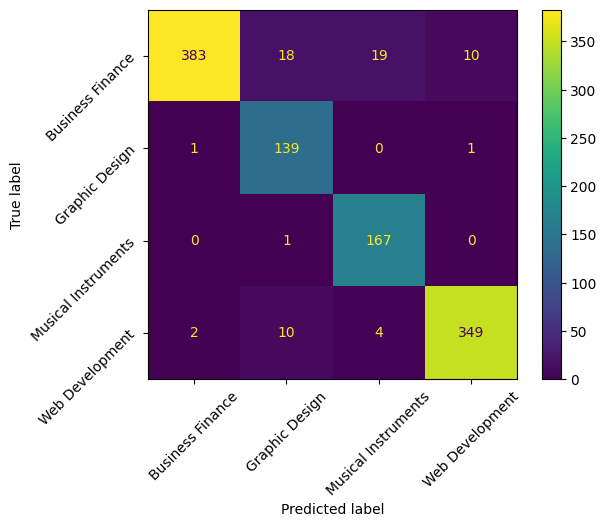

In [35]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_fit.classes_)
# , xticks_rotation=40
disp.plot()
tick_marks = np.arange(len(lab))
plt.xticks(tick_marks, rotation=45)
plt.yticks(tick_marks, rotation=45)
plt.show()

In [36]:
text ="Will be playing my musical instruments"
def vect_test(text):
    vec_app=tfidf_vec.transform([text])
    return vec_app.toarray()
vect_test(text)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [37]:
vect_test(text)
sample1= vect_test(text)

In [38]:
pred1= lr_fit.predict(sample1)
pred1
pred2= lr_fit.predict_proba(sample1)
print(pred1)
print(pred2)

['Musical Instruments']
[[0.32149054 0.15017373 0.34498102 0.18335471]]


In [39]:
lr_fit.classes_

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [42]:
#!pip3 install eli5
# !pip3 install lime
# !pip3 install eli5
#!conda install -c conda-forge eli5
import lime
import eli5

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\salsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\metaestimators.py)

In [41]:
### expaling weights
eli5.show_weights(lr_fit)
#eli5.show_weights(lr_fit, feature_names=tfidf_vec.get_feature_names())
eli5.show_weights(lr_fit, vec=tfidf_vec)

NameError: name 'eli5' is not defined

In [ ]:
############# explain one predictiom
text ="we are developing ML web page"
eli5.show_prediction(lr_fit, text, vec=tfidf_vec)
# feature_names=tfidf_vec.get_feature_names()
# feature_names

In [ ]:
############# explain one predictiom
text ="we are developing financial service web page"
lr_fit.predict(vect_test(text))
eli5.show_prediction(lr_fit, text, vec=tfidf_vec)


In [ ]:
### Method 1- for Deploying and Saving Model -Pickle Method

In [43]:
############## Saving ML Model Pickle @@@@@@@@@@@@@@@@@@@@@@@@@
import joblib
save_model =open("My_firt_texet_model.pkl", 'wb')
joblib.dump(lr_fit,save_model)
save_model.close()

In [44]:
### Method 2- Creation of Pipeline for  Deploying and Saving Model -Pipelne 
####### Pipeline approach is made up of two parts- Transformation part and Estimator part @@@@@@@

###################### Transformer #####################################
tf_idfvec= TfidfVectorizer()
vec_prep=vect_test(text)

######### Estimators @@@@@@@@@@@@@@
lr_icf= LogisticRegression()
lr_NB = MultinomialNB()

In [45]:
from sklearn.pipeline import make_pipeline, Pipeline

In [46]:
lr_icfp = make_pipeline(tf_idfvec,lr_icf)
lr_NBp = make_pipeline(tf_idfvec,lr_NB)
# tf_idfvec
############# print Steps @@@@@@@@@@@@@@@@@@
lr_NBp.steps
lr_icfp.steps

[('tfidfvectorizer', TfidfVectorizer()),
 ('logisticregression', LogisticRegression())]

In [47]:
######### Split again @@@@@@@@@@@@@@@@
from sklearn.model_selection import train_test_split
x_train_2, x_test_2, y_train_2, y_test_2= train_test_split(xfeatures, ylabel, test_size=0.3, random_state=42)
print(x_train_2.shape, x_test_2.shape, y_train_2.shape, y_test_2.shape)

(2574,) (1104,) (2574,) (1104,)


In [48]:
print(x_train_2)

1644                                 fantasy map design
168               analysis company financial statements
3410         complete ecommerce web developer course 50
962                stock trading essentials day traders
945                             triple p trading course
                             ...                       
1130            free options 101  basic options 1 hours
1294    discover 7 secrets figure drawing draw awesome 
860                                 trading busy people
3507         fun creative web engineering python web2py
3174                                java web services 2
Name: course_title_clean, Length: 2574, dtype: object


In [49]:
lr_icfp=lr_icfp.fit(x_train_2,y_train_2)
lr_icfp.score(x_test_2,y_test_2)

0.9438405797101449

In [50]:
lr_NBp=lr_NBp.fit(x_train_2,y_train_2)
lr_NBp.score(x_test_2,y_test_2)

0.9402173913043478

In [51]:
################ Predict with Pipeline @@@@@@@@@@@@@@@@@@@@@@2
#we are developing financial service web page
print(text)
vec_prep=vect_test(text)
print(vec_prep)
#lr_icfp.predict(['we are developing financial service web page'])
lr_icfp.predict(x_test_2)

#lr_NBp.predict(['we are developing financial service web page'])


Will be playing my musical instruments
[[0. 0. 0. ... 0. 0. 0.]]


array(['Business Finance', 'Graphic Design', 'Web Development', ...,
       'Graphic Design', 'Web Development', 'Graphic Design'],
      dtype=object)

In [52]:
############# END of the Model Dev todays 09/02/2023 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
####################### Perfect ENDED @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@